In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from config import api_key

# Define the dataset path
dataset = 'NUFORC/ufo-sightings'
url = f'https://www.kaggle.com/api/v1/datasets/download/{dataset}'

# Set headers for authentication
headers = {
    'Authorization': f'Bearer {api_key}'
}

# Send a GET request to download the dataset
response = requests.get(url, headers=headers, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Save the dataset to a zip file
    with open('ufo_sightings.zip', 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print('Dataset downloaded successfully.')
else:
    print(f'Failed to download dataset: {response.status_code}, {response.text}')
# Unzip the downloaded file
import zipfile

with zipfile.ZipFile('ufo_sightings.zip', 'r') as zip_ref:
    zip_ref.extractall('ufo_sightings')

print('Dataset extracted to ufo_sightings directory.')

Dataset downloaded successfully.
Dataset extracted to ufo_sightings directory.


In [3]:
dtype = {
    5: str,  
    9: str  
}
df = pd.read_csv("ufo_sightings/scrubbed.csv", dtype=dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [5]:
df['country'] = df['country'].str.upper()
df['state'] = df['state'].str.upper()

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [9]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time


In [11]:
df

datetime                  city state country     shape  \
0     1949-10-10 20:30:00            san marcos    TX      US  cylinder   
1     1949-10-10 21:00:00          lackland afb    TX     NaN     light   
2     1955-10-10 17:00:00  chester (uk/england)   NaN      GB    circle   
3     1956-10-10 21:00:00                  edna    TX      US    circle   
4     1960-10-10 20:00:00               kaneohe    HI      US     light   
...                   ...                   ...   ...     ...       ...   
80327 2013-09-09 21:15:00             nashville    TN      US     light   
80328 2013-09-09 22:00:00                 boise    ID      US    circle   
80329 2013-09-09 22:00:00                  napa    CA      US     other   
80330 2013-09-09 22:20:00                vienna    VA      US    circle   
80331 2013-09-09 23:00:00                edmond    OK      US     cigar   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minutes   
1                   7200              1-2 hrs   
2                     20           20 seconds   
3                     20             1/2 hour   
4                    900           15 minutes   
...                  ...                  ...   
80327                600           10 minutes   
80328               1200           20 minutes   
80329               1200                 hour   
80330                  5            5 seconds   
80331               1020           17 minutes   

                                                comments date posted  \
0      This event took place in early fall around 194...   4/27/2004   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   
2      Green/Orange circular disc over Chester&#44 En...   1/21/2008   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...   9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   9/30/2013   
80329                                       Napa UFO&#44   9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   

         latitude  longitude         date      time  
0      29.8830556  -97.941111  1949-10-10  20:30:00  
1        29.38421  -98.581082  1949-10-10  21:00:00  
2            53.2   -2.916667  1955-10-10  17:00:00  
3      28.9783333  -96.645833  1956-10-10  21:00:00  
4      21.4180556 -157.803611  1960-10-10  20:00:00  
...           ...         ...         ...       ...  
80327  36.1658333  -86.784444  2013-09-09  21:15:00  
80328  43.6136111 -116.202500  2013-09-09  22:00:00  
80329  38.2972222 -122.284444  2013-09-09  22:00:00  
80330  38.9011111  -77.265556  2013-09-09  22:20:00  
80331  35.6527778  -97.477778  2013-09-09  23:00:00  

[80332 rows x 13 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              79638 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
 11  date                  79638 non-null  object        
 12  time                  79638 non-null  object        
dtypes: datetime64[ns

In [15]:
df.dropna(inplace=True)

In [17]:
df

datetime        city state country     shape  \
0     1949-10-10 20:30:00  san marcos    TX      US  cylinder   
3     1956-10-10 21:00:00        edna    TX      US    circle   
4     1960-10-10 20:00:00     kaneohe    HI      US     light   
5     1961-10-10 19:00:00     bristol    TN      US    sphere   
7     1965-10-10 23:45:00     norwalk    CT      US      disk   
...                   ...         ...   ...     ...       ...   
80327 2013-09-09 21:15:00   nashville    TN      US     light   
80328 2013-09-09 22:00:00       boise    ID      US    circle   
80329 2013-09-09 22:00:00        napa    CA      US     other   
80330 2013-09-09 22:20:00      vienna    VA      US    circle   
80331 2013-09-09 23:00:00      edmond    OK      US     cigar   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minutes   
3                     20             1/2 hour   
4                    900           15 minutes   
5                    300            5 minutes   
7                   1200           20 minutes   
...                  ...                  ...   
80327                600           10 minutes   
80328               1200           20 minutes   
80329               1200                 hour   
80330                  5            5 seconds   
80331               1020           17 minutes   

                                                comments date posted  \
0      This event took place in early fall around 194...   4/27/2004   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
5      My father is now 89 my brother 52 the girl wit...   4/27/2007   
7      A bright orange color changing to reddish colo...   10/2/1999   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...   9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   9/30/2013   
80329                                       Napa UFO&#44   9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   

         latitude  longitude         date      time  
0      29.8830556  -97.941111  1949-10-10  20:30:00  
3      28.9783333  -96.645833  1956-10-10  21:00:00  
4      21.4180556 -157.803611  1960-10-10  20:00:00  
5      36.5950000  -82.188889  1961-10-10  19:00:00  
7      41.1175000  -73.408333  1965-10-10  23:45:00  
...           ...         ...         ...       ...  
80327  36.1658333  -86.784444  2013-09-09  21:15:00  
80328  43.6136111 -116.202500  2013-09-09  22:00:00  
80329  38.2972222 -122.284444  2013-09-09  22:00:00  
80330  38.9011111  -77.265556  2013-09-09  22:20:00  
80331  35.6527778  -97.477778  2013-09-09  23:00:00  

[66040 rows x 13 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66040 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              66040 non-null  datetime64[ns]
 1   city                  66040 non-null  object        
 2   state                 66040 non-null  object        
 3   country               66040 non-null  object        
 4   shape                 66040 non-null  object        
 5   duration (seconds)    66040 non-null  object        
 6   duration (hours/min)  66040 non-null  object        
 7   comments              66040 non-null  object        
 8   date posted           66040 non-null  object        
 9   latitude              66040 non-null  object        
 10  longitude             66040 non-null  float64       
 11  date                  66040 non-null  object        
 12  time                  66040 non-null  object        
dtypes: datetime64[ns](1),

In [21]:
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder               2700   
3 1956-10-10 21:00:00        edna    TX      US    circle                 20   
4 1960-10-10 20:00:00     kaneohe    HI      US     light                900   
5 1961-10-10 19:00:00     bristol    TN      US    sphere                300   
7 1965-10-10 23:45:00     norwalk    CT      US      disk               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted    latitude  longitude         date      time  
0   4/27/2004  29.8830556  -97.941111  1949-10-10  20:30:00  
3   1/17/2004  28.9783333  -96.645833  1956-10-10  21:00:00  
4   1/22/2004  21.4180556 -157.803611  1960-10-10  20:00:00  
5   4/27/2007  36.5950000  -82.188889  1961-10-10  19:00:00  
7   10/2/1999  41.1175000  -73.408333  1965-10-10  23:45:00

In [23]:
df['datetime'].dt.year.value_counts().sort_index()

datetime
1910       1
1920       1
1925       1
1929       1
1931       2
        ... 
2010    3626
2011    4430
2012    6450
2013    6202
2014    1969
Name: count, Length: 83, dtype: int64

<Axes: xlabel='datetime'>

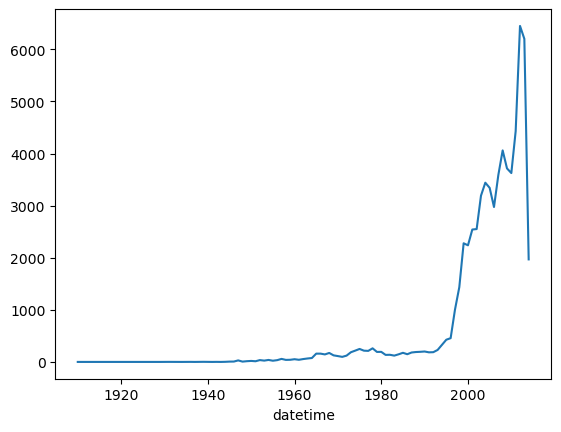

In [25]:
df['datetime'].dt.year.value_counts().sort_index().plot()

<Axes: xlabel='datetime'>

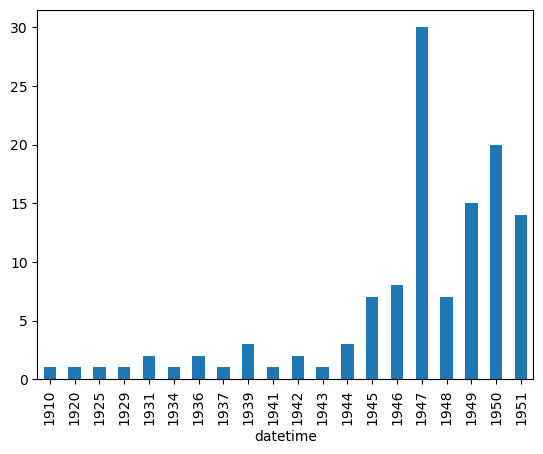

In [26]:
# Compare the trend of UFO sightings over the years
df['datetime'].dt.year.value_counts().sort_index().head(20).plot(kind='bar')

<Axes: xlabel='datetime'>

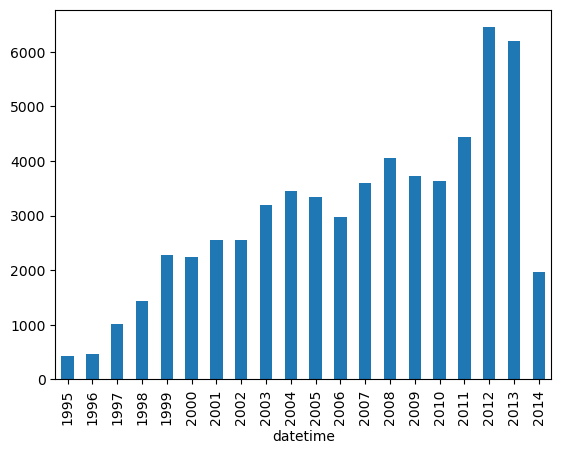

In [28]:
df['datetime'].dt.year.value_counts().sort_index().tail(20).plot(kind='bar')

In [30]:
df['year'] = df['datetime'].dt.year
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder               2700   
3 1956-10-10 21:00:00        edna    TX      US    circle                 20   
4 1960-10-10 20:00:00     kaneohe    HI      US     light                900   
5 1961-10-10 19:00:00     bristol    TN      US    sphere                300   
7 1965-10-10 23:45:00     norwalk    CT      US      disk               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted    latitude  longitude         date      time  year  
0   4/27/2004  29.8830556  -97.941111  1949-10-10  20:30:00  1949  
3   1/17/2004  28.9783333  -96.645833  1956-10-10  21:00:00  1956  
4   1/22/2004  21.4180556 -157.803611  1960-10-10  20:00:00  1960  
5   4/27/2007  36.5950000  -82.188889  1961-10-10  19:00:00  1961  
7   10/2/1999  41.1175000  -73.408333  1965-10-10  23:45:00  1965

In [31]:
df.groupby(['country', 'year']).count()


datetime  city  state  shape  duration (seconds)  \
country year                                                     
AU      1996         1     1      1      1                   1   
        2000         1     1      1      1                   1   
        2002         2     2      2      2                   2   
        2005         1     1      1      1                   1   
        2006         1     1      1      1                   1   
...                ...   ...    ...    ...                 ...   
US      2010      3488  3488   3488   3488                3488   
        2011      4306  4306   4306   4306                4306   
        2012      6216  6216   6216   6216                6216   
        2013      5961  5961   5961   5961                5961   
        2014      1927  1927   1927   1927                1927   

              duration (hours/min)  comments  date posted  latitude  \
country year                                                          
AU      1996                     1         1            1         1   
        2000                     1         1            1         1   
        2002                     2         2            2         2   
        2005                     1         1            1         1   
        2006                     1         1            1         1   
...                            ...       ...          ...       ...   
US      2010                  3488      3488         3488      3488   
        2011                  4306      4306         4306      4306   
        2012                  6216      6216         6216      6216   
        2013                  5961      5961         5961      5961   
        2014                  1927      1927         1927      1927   

              longitude   date  time  
country year                          
AU      1996           1     1     1  
        2000           1     1     1  
        2002           2     2     2  
        2005           1     1     1  
        2006           1     1     1  
...                  ...   ...   ...  
US      2010        3488  3488  3488  
        2011        4306  4306  4306  
        2012        6216  6216  6216  
        2013        5961  5961  5961  
        2014        1927  1927  1927  

[162 rows x 12 columns]

In [32]:
df.groupby(['country', 'year']).size()
country_year_counts = df.groupby(['country', 'year']).size().reset_index(name='counts')
country_year_counts

country  year  counts
0        AU  1996       1
1        AU  2000       1
2        AU  2002       2
3        AU  2005       1
4        AU  2006       1
..      ...   ...     ...
157      US  2010    3488
158      US  2011    4306
159      US  2012    6216
160      US  2013    5961
161      US  2014    1927

[162 rows x 3 columns]

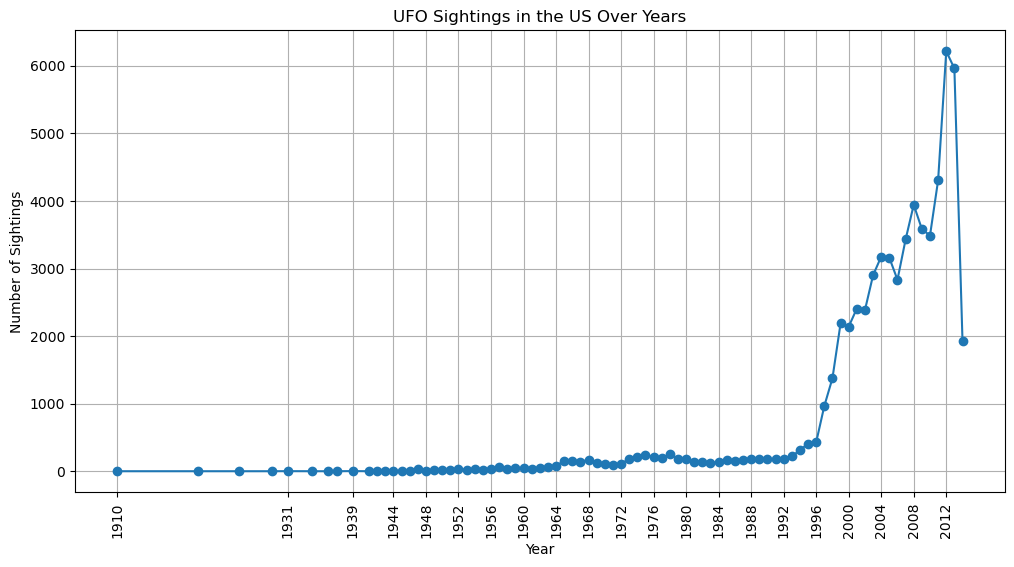

In [39]:
us_data = country_year_counts[country_year_counts['country'] == 'US']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(us_data['year'], us_data['counts'], marker='o')
plt.title('UFO Sightings in the US Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(us_data['year'][::4], rotation=90)
plt.grid()
plt.show()

In [39]:
df['country'].unique()

array(['us', 'ca', 'au', 'gb'], dtype=object)

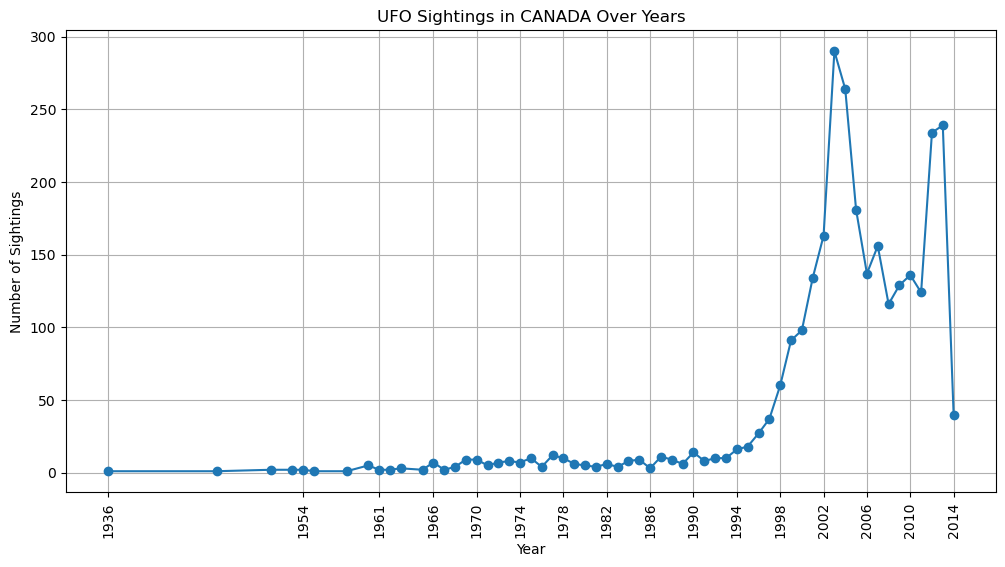

In [41]:
#CANADA
ca_data = country_year_counts[country_year_counts['country'] == 'CA']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ca_data['year'], ca_data['counts'], marker='o')
plt.title('UFO Sightings in CANADA Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(ca_data['year'][::4], rotation=90)
plt.grid()
plt.show()

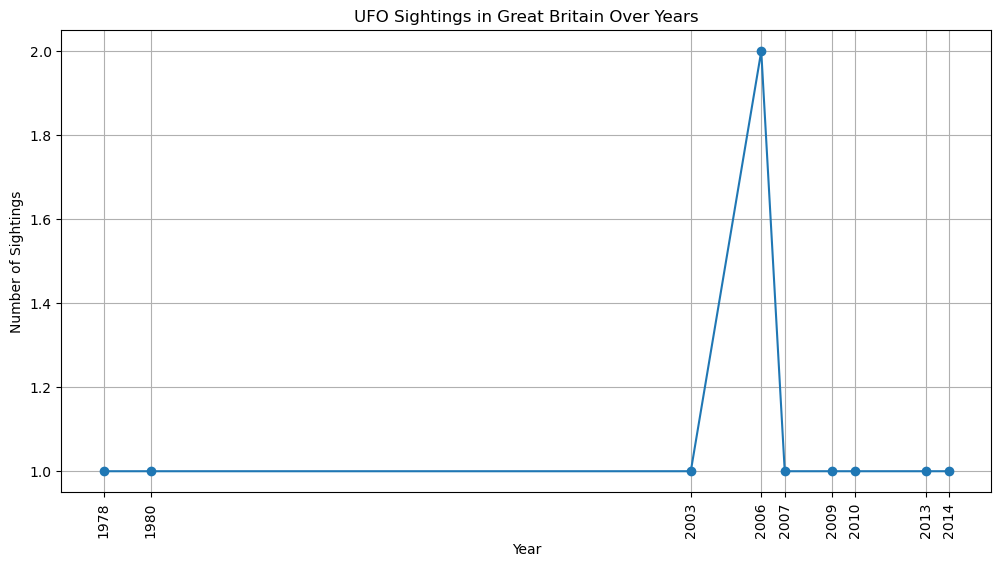

In [45]:
#Great Britain
gb_data = country_year_counts[country_year_counts['country'] == 'GB']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(gb_data['year'], gb_data['counts'], marker='o')
plt.title('UFO Sightings in Great Britain Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(gb_data['year'], rotation=90)
plt.grid()
plt.show()

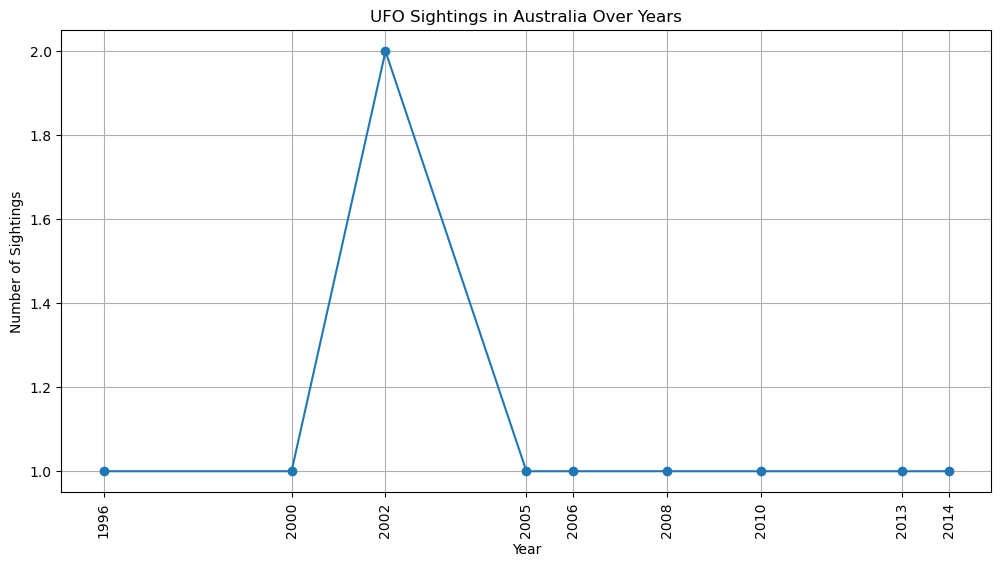

In [43]:
#Australia
au_data = country_year_counts[country_year_counts['country'] == 'AU']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(au_data['year'], au_data['counts'], marker='o')
plt.title('UFO Sightings in Australia Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(au_data['year'], rotation=90)
plt.grid()
plt.show()

In [47]:
country_year_counts['country'].value_counts()

country
US    83
CA    61
AU     9
GB     9
Name: count, dtype: int64

In [49]:
country = country_year_counts.groupby('country')['year'].sum().sort_values(ascending=False)
country

country
US    163696
CA    120974
AU     18054
GB     18020
Name: year, dtype: int32

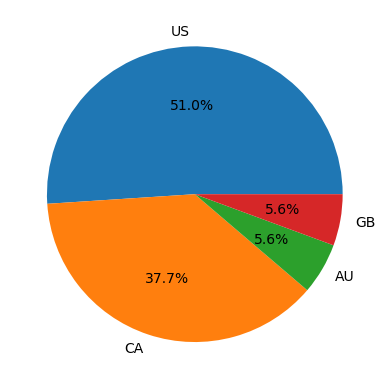

In [51]:
plt.pie(country, labels=country.index.str.upper(), autopct="%1.1f%%")
plt.show()

In [53]:
# US sightings for linear regression
from scipy.stats import linregress
us_data

country  year  counts
79       US  1910       1
80       US  1920       1
81       US  1925       1
82       US  1929       1
83       US  1931       2
..      ...   ...     ...
157      US  2010    3488
158      US  2011    4306
159      US  2012    6216
160      US  2013    5961
161      US  2014    1927

[83 rows x 3 columns]

The r-squared is: 0.47089345433191243, pvalue is : 8.085289290550622e-13


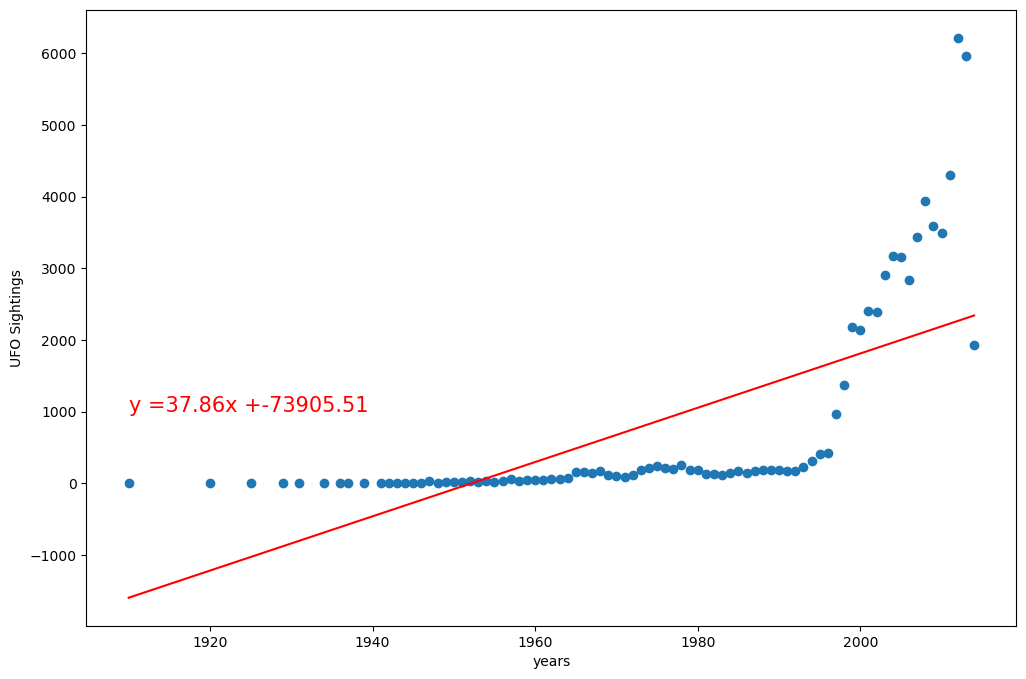

In [55]:
plt.figure(figsize=(12,8))
x_values = us_data['year']
y_values = us_data['counts']

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (1910,1000), fontsize=15, color='red')

plt.xlabel('years')
plt.ylabel('UFO Sightings')

print(f"The r-squared is: {rvalue**2}, pvalue is : {pvalue}")

plt.show()

**SUMMARY**

**R-Squared Value:**
- This value indicates that 47.09% of the variability in UFO sightings can be explained by the year variable in our model
- Since the value of r^2 is not a perfect 1, we can say that value of 0.47 suggests a moderate correlation between year and UFO sightings

**pvalue:**
- The p-value is much lesser than 0.05.
- This suggests strong evidence against null hypothesis.
- We can infer that the relationship between year and UFO sightings is significant.

**Linear Regression Equation:**
- The positive slope indicates that the UFO sightings have increased over the years
- This could suggest that there is a growing interest among public on this topic, better reporting options for public in recent years, or actual increase in the UFO sightings
- The presence of scatter points around the line plot indicate that many factors can impact the outcomes which are not included in our dataset.
  


In [58]:
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder               2700   
3 1956-10-10 21:00:00        edna    TX      US    circle                 20   
4 1960-10-10 20:00:00     kaneohe    HI      US     light                900   
5 1961-10-10 19:00:00     bristol    TN      US    sphere                300   
7 1965-10-10 23:45:00     norwalk    CT      US      disk               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted    latitude  longitude         date      time  year  
0   4/27/2004  29.8830556  -97.941111  1949-10-10  20:30:00  1949  
3   1/17/2004  28.9783333  -96.645833  1956-10-10  21:00:00  1956  
4   1/22/2004  21.4180556 -157.803611  1960-10-10  20:00:00  1960  
5   4/27/2007  36.5950000  -82.188889  1961-10-10  19:00:00  1961  
7   10/2/1999  41.1175000  -73.408333  1965-10-10  23:45:00  1965

In [60]:
df['shape'].unique()

array(['cylinder', 'circle', 'light', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'rectangle', 'chevron', 'formation',
       'triangle', 'cigar', 'delta', 'changing', 'egg', 'diamond',
       'flash', 'teardrop', 'cone', 'cross', 'pyramid', 'round', 'flare',
       'hexagon', 'crescent', 'changed'], dtype=object)

In [62]:
df['shape'] = df['shape'].str.lower().str.strip()

In [64]:
#Define mapping for shapes
shape_mapping = {
    'disk': 'disc',
    'circle': 'disc',
    'oval': 'disc',
    'round': 'disc',
    'fireball': 'light',
    'changing': 'other',
    'changed': 'other',
    'unknown': 'other',
    'light': 'light',
}
# Replace the values based on the mapping
df['shape'] = df['shape'].replace(shape_mapping)

In [66]:
df['shape'].unique()

array(['cylinder', 'disc', 'light', 'sphere', 'other', 'rectangle',
       'chevron', 'formation', 'triangle', 'cigar', 'delta', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'flare', 'hexagon', 'crescent'], dtype=object)

In [68]:
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    tx      us  cylinder               2700   
3 1956-10-10 21:00:00        edna    tx      us      disc                 20   
4 1960-10-10 20:00:00     kaneohe    hi      us     light                900   
5 1961-10-10 19:00:00     bristol    tn      us    sphere                300   
7 1965-10-10 23:45:00     norwalk    ct      us      disc               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted    latitude  longitude         date      time  year  
0   4/27/2004  29.8830556  -97.941111  1949-10-10  20:30:00  1949  
3   1/17/2004  28.9783333  -96.645833  1956-10-10  21:00:00  1956  
4   1/22/2004  21.4180556 -157.803611  1960-10-10  20:00:00  1960  
5   4/27/2007  36.5950000  -82.188889  1961-10-10  19:00:00  1961  
7   10/2/1999  41.1175000  -73.408333  1965-10-10  23:45:00  1965

In [70]:
df['shape'].value_counts()

shape
light        19398
disc         13760
other        11028
triangle      6779
sphere        4516
formation     2074
cigar         1701
flash         1122
rectangle     1109
cylinder      1066
diamond        960
chevron        849
teardrop       612
egg            605
cone           256
cross          194
delta            7
pyramid          1
flare            1
hexagon          1
crescent         1
Name: count, dtype: int64

In [72]:
df['shape'].count()

66040

In [74]:
df.groupby('state')['shape'].value_counts()

state  shape   
ab     light       67
       other       57
       disc        47
       triangle    30
       sphere      20
                   ..
yt     light        2
       other        2
       disc         1
       sphere       1
       triangle     1
Name: count, Length: 953, dtype: int64

In [76]:
df.groupby('country')['shape'].value_counts()

country  shape    
au       disc             3
         light            3
         chevron          1
         diamond          1
         other            1
         rectangle        1
ca       light          865
         disc           600
         other          512
         triangle       266
         sphere         205
         formation       95
         cigar           74
         flash           61
         cylinder        52
         rectangle       46
         diamond         39
         chevron         36
         egg             28
         teardrop        22
         cone            10
         cross            9
         delta            1
gb       disc             4
         light            3
         triangle         2
         sphere           1
us       light        18527
         disc         13153
         other        10515
         triangle      6511
         sphere        4310
         formation     1979
         cigar         1627
         rectangle     1062
 

In [78]:
shape_df = df.groupby('country')['shape'].value_counts()
shape_df

country  shape    
au       disc             3
         light            3
         chevron          1
         diamond          1
         other            1
         rectangle        1
ca       light          865
         disc           600
         other          512
         triangle       266
         sphere         205
         formation       95
         cigar           74
         flash           61
         cylinder        52
         rectangle       46
         diamond         39
         chevron         36
         egg             28
         teardrop        22
         cone            10
         cross            9
         delta            1
gb       disc             4
         light            3
         triangle         2
         sphere           1
us       light        18527
         disc         13153
         other        10515
         triangle      6511
         sphere        4310
         formation     1979
         cigar         1627
         rectangle     1062
 

In [80]:
df.groupby('shape')['country'].value_counts()

shape      country
chevron    us           812
           ca            36
           au             1
cigar      us          1627
           ca            74
cone       us           246
           ca            10
crescent   us             1
cross      us           185
           ca             9
cylinder   us          1014
           ca            52
delta      us             6
           ca             1
diamond    us           920
           ca            39
           au             1
disc       us         13153
           ca           600
           gb             4
           au             3
egg        us           577
           ca            28
flare      us             1
flash      us          1061
           ca            61
formation  us          1979
           ca            95
hexagon    us             1
light      us         18527
           ca           865
           au             3
           gb             3
other      us         10515
           ca           512
 

In [82]:
df1 = df[['shape','country']].value_counts()
df1

shape      country
light      us         18527
disc       us         13153
other      us         10515
triangle   us          6511
sphere     us          4310
formation  us          1979
cigar      us          1627
rectangle  us          1062
flash      us          1061
cylinder   us          1014
diamond    us           920
light      ca           865
chevron    us           812
disc       ca           600
teardrop   us           590
egg        us           577
other      ca           512
triangle   ca           266
cone       us           246
sphere     ca           205
cross      us           185
formation  ca            95
cigar      ca            74
flash      ca            61
cylinder   ca            52
rectangle  ca            46
diamond    ca            39
chevron    ca            36
egg        ca            28
teardrop   ca            22
cone       ca            10
cross      ca             9
delta      us             6
disc       gb             4
light      au             3
d

In [84]:
df2 = df1.reset_index()
df2

shape country  count
0       light      us  18527
1        disc      us  13153
2       other      us  10515
3    triangle      us   6511
4      sphere      us   4310
5   formation      us   1979
6       cigar      us   1627
7   rectangle      us   1062
8       flash      us   1061
9    cylinder      us   1014
10    diamond      us    920
11      light      ca    865
12    chevron      us    812
13       disc      ca    600
14   teardrop      us    590
15        egg      us    577
16      other      ca    512
17   triangle      ca    266
18       cone      us    246
19     sphere      ca    205
20      cross      us    185
21  formation      ca     95
22      cigar      ca     74
23      flash      ca     61
24   cylinder      ca     52
25  rectangle      ca     46
26    diamond      ca     39
27    chevron      ca     36
28        egg      ca     28
29   teardrop      ca     22
30       cone      ca     10
31      cross      ca      9
32      delta      us      6
33       disc      gb      4
34      light      au      3
35       disc      au      3
36      light      gb      3
37   triangle      gb      2
38   crescent      us      1
39     sphere      gb      1
40    pyramid      us      1
41      delta      ca      1
42  rectangle      au      1
43      flare      us      1
44    diamond      au      1
45      other      au      1
46    hexagon      us      1
47    chevron      au      1

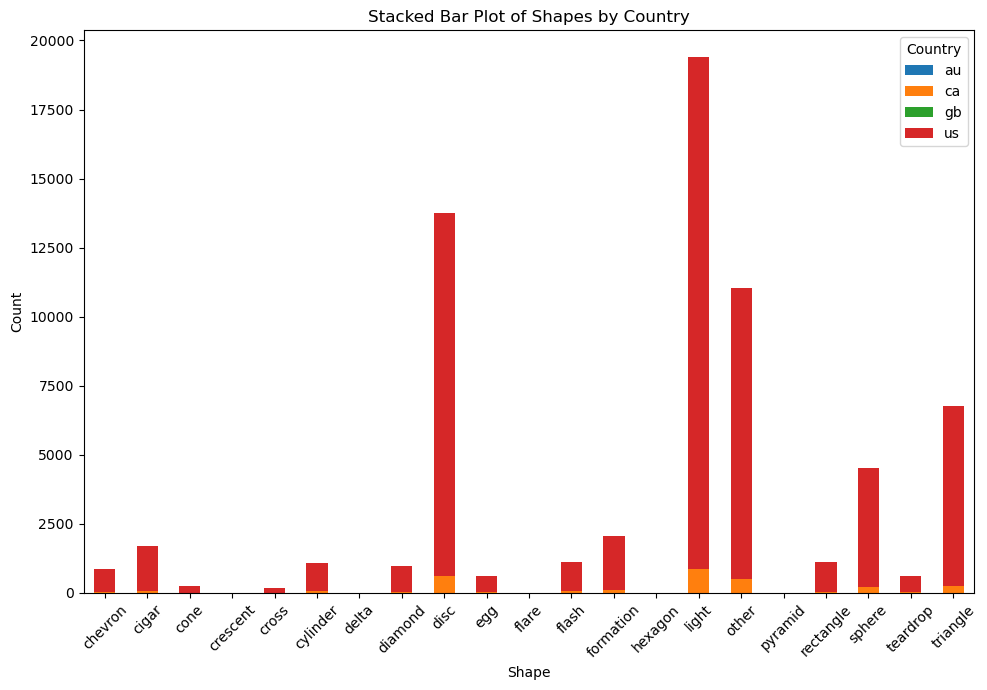

In [86]:
pivot_df = df2.pivot_table(index='shape', columns='country', values='count', fill_value=0)

# Plotting the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.title('Stacked Bar Plot of Shapes by Country')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
UFOShape_df = df.groupby('shape')['country'].value_counts()
UFOShape_df

shape      country
chevron    us           812
           ca            36
           au             1
cigar      us          1627
           ca            74
cone       us           246
           ca            10
crescent   us             1
cross      us           185
           ca             9
cylinder   us          1014
           ca            52
delta      us             6
           ca             1
diamond    us           920
           ca            39
           au             1
disc       us         13153
           ca           600
           gb             4
           au             3
egg        us           577
           ca            28
flare      us             1
flash      us          1061
           ca            61
formation  us          1979
           ca            95
hexagon    us             1
light      us         18527
           ca           865
           au             3
           gb             3
other      us         10515
           ca           512
 

In [90]:
UFOShape_unstacked= UFOShape_df.unstack()
UFOShape_unstacked.columns = UFOShape_unstacked.columns.str.upper()
UFOShape_unstacked

country     AU     CA   GB       US
shape                              
chevron    1.0   36.0  NaN    812.0
cigar      NaN   74.0  NaN   1627.0
cone       NaN   10.0  NaN    246.0
crescent   NaN    NaN  NaN      1.0
cross      NaN    9.0  NaN    185.0
cylinder   NaN   52.0  NaN   1014.0
delta      NaN    1.0  NaN      6.0
diamond    1.0   39.0  NaN    920.0
disc       3.0  600.0  4.0  13153.0
egg        NaN   28.0  NaN    577.0
flare      NaN    NaN  NaN      1.0
flash      NaN   61.0  NaN   1061.0
formation  NaN   95.0  NaN   1979.0
hexagon    NaN    NaN  NaN      1.0
light      3.0  865.0  3.0  18527.0
other      1.0  512.0  NaN  10515.0
pyramid    NaN    NaN  NaN      1.0
rectangle  1.0   46.0  NaN   1062.0
sphere     NaN  205.0  1.0   4310.0
teardrop   NaN   22.0  NaN    590.0
triangle   NaN  266.0  2.0   6511.0

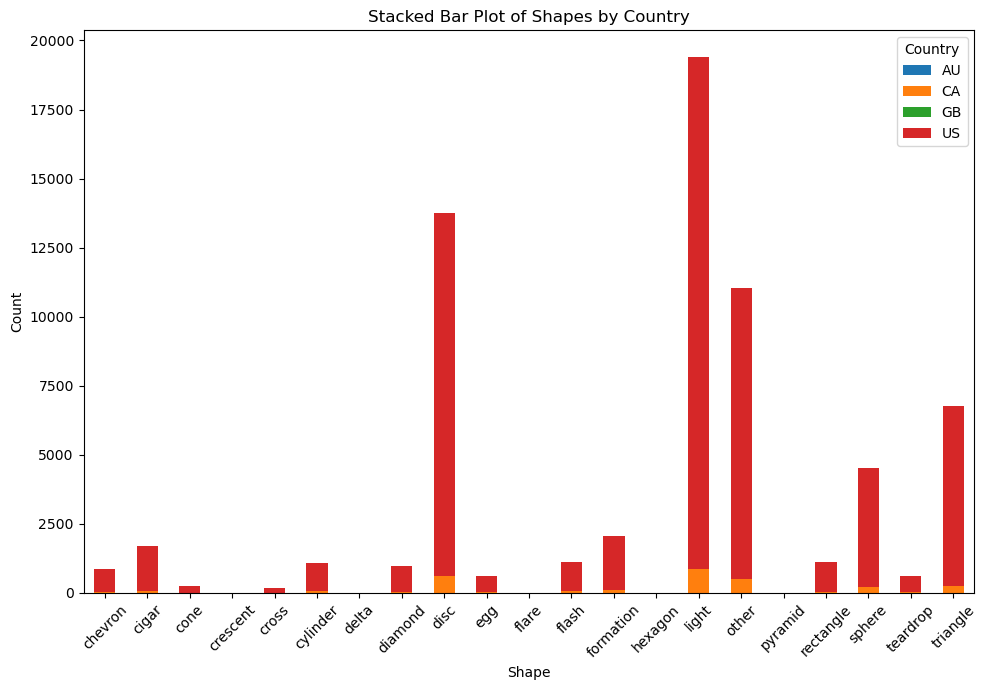

In [92]:
# Plotting the stacked bar plot
UFOShape_unstacked.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.title('Stacked Bar Plot of Shapes by Country')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# UFO sightings by country, highlighting the country with the highest number of sightings, along with a list of states within that country that have reported the most sightings."

In [60]:
df

datetime        city state country     shape  \
0     1949-10-10 20:30:00  san marcos    TX      US  cylinder   
3     1956-10-10 21:00:00        edna    TX      US    circle   
4     1960-10-10 20:00:00     kaneohe    HI      US     light   
5     1961-10-10 19:00:00     bristol    TN      US    sphere   
7     1965-10-10 23:45:00     norwalk    CT      US      disk   
...                   ...         ...   ...     ...       ...   
80327 2013-09-09 21:15:00   nashville    TN      US     light   
80328 2013-09-09 22:00:00       boise    ID      US    circle   
80329 2013-09-09 22:00:00        napa    CA      US     other   
80330 2013-09-09 22:20:00      vienna    VA      US    circle   
80331 2013-09-09 23:00:00      edmond    OK      US     cigar   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minutes   
3                     20             1/2 hour   
4                    900           15 minutes   
5                    300            5 minutes   
7                   1200           20 minutes   
...                  ...                  ...   
80327                600           10 minutes   
80328               1200           20 minutes   
80329               1200                 hour   
80330                  5            5 seconds   
80331               1020           17 minutes   

                                                comments date posted  \
0      This event took place in early fall around 194...   4/27/2004   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
5      My father is now 89 my brother 52 the girl wit...   4/27/2007   
7      A bright orange color changing to reddish colo...   10/2/1999   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...   9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   9/30/2013   
80329                                       Napa UFO&#44   9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   

         latitude  longitude         date      time  year  
0      29.8830556  -97.941111  1949-10-10  20:30:00  1949  
3      28.9783333  -96.645833  1956-10-10  21:00:00  1956  
4      21.4180556 -157.803611  1960-10-10  20:00:00  1960  
5      36.5950000  -82.188889  1961-10-10  19:00:00  1961  
7      41.1175000  -73.408333  1965-10-10  23:45:00  1965  
...           ...         ...         ...       ...   ...  
80327  36.1658333  -86.784444  2013-09-09  21:15:00  2013  
80328  43.6136111 -116.202500  2013-09-09  22:00:00  2013  
80329  38.2972222 -122.284444  2013-09-09  22:00:00  2013  
80330  38.9011111  -77.265556  2013-09-09  22:20:00  2013  
80331  35.6527778  -97.477778  2013-09-09  23:00:00  2013  

[66040 rows x 14 columns]

In [62]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#map showing records of sightings from 4 countries:
df['latitude'] = df['latitude'].astype(float)
df['longitude '] = df['longitude '].astype(float)
# Configure the map plot_1
map_plot_1 = df.hvplot.points(
    "longitude ",
    "latitude",
    geo=True,
    tiles="OSM",
    size=5,  # Adjust the point size as needed
    color='city',  # Optional: color points by city
    alpha=0.7, # Optional: set transparency for better visibility
    width=2000,
    height=1500
)

# Display the map plot_1
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude ,latitude]   (city)

# Trends of UFO sightings by states in the US. Did any state/states report high number of UFO sightings compared to others?

In [64]:
us_filtered_df = df[df['country'] == 'US']
US_Statewise_SightingsCount = us_filtered_df.groupby('country')['state'].value_counts() 
US_Statewise_SightingsCount

country  state
US       CA       8620
         FL       3732
         WA       3686
         TX       3367
         NY       2894
         IL       2431
         AZ       2348
         PA       2308
         OH       2229
         MI       1772
         NC       1711
         OR       1652
         MO       1422
         CO       1378
         IN       1265
         VA       1238
         GA       1228
         NJ       1225
         MA       1224
         WI       1194
         TN       1089
         MN        989
         SC        979
         CT        857
         KY        833
         MD        814
         NV        773
         OK        708
         NM        686
         IA        664
         AL        625
         UT        608
         KS        595
         AR        569
         ME        541
         LA        540
         ID        506
         NH        482
         MT        456
         WV        436
         NE        371
         MS        363
         AK        

In [66]:
us_filtered_state = US_Statewise_SightingsCount.loc['US']
us_filtered_state

state
CA    8620
FL    3732
WA    3686
TX    3367
NY    2894
IL    2431
AZ    2348
PA    2308
OH    2229
MI    1772
NC    1711
OR    1652
MO    1422
CO    1378
IN    1265
VA    1238
GA    1228
NJ    1225
MA    1224
WI    1194
TN    1089
MN     989
SC     979
CT     857
KY     833
MD     814
NV     773
OK     708
NM     686
IA     664
AL     625
UT     608
KS     595
AR     569
ME     541
LA     540
ID     506
NH     482
MT     456
WV     436
NE     371
MS     363
AK     303
HI     253
VT     253
RI     222
SD     174
WY     167
DE     165
ND     123
PR      24
DC       7
Name: count, dtype: int64

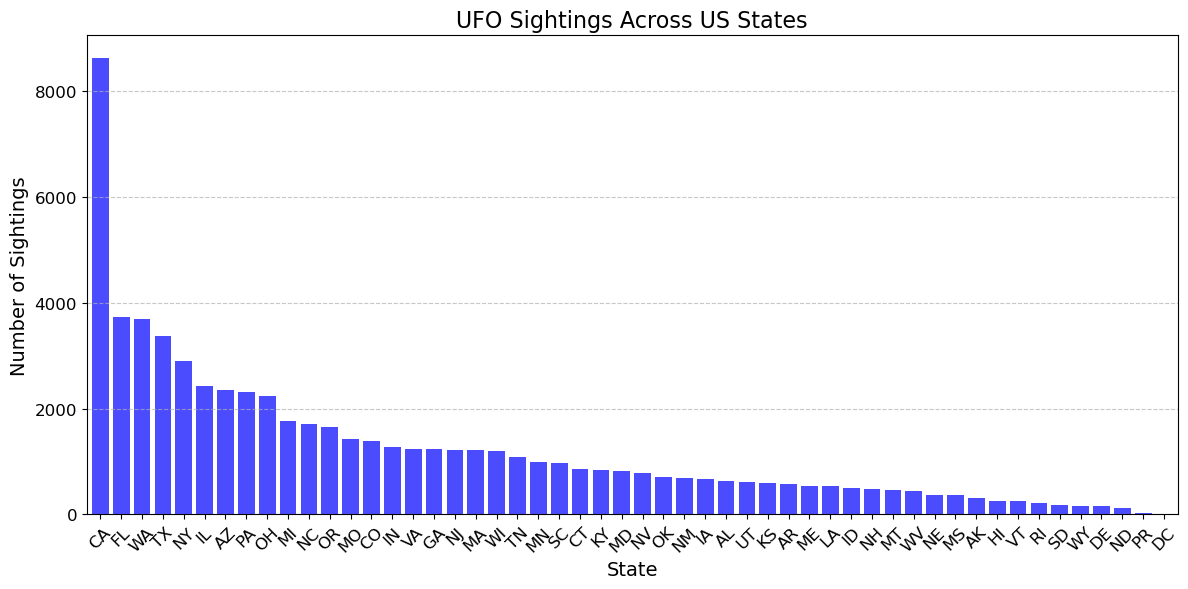

In [68]:
ax = us_filtered_state.plot(
    kind='bar',
    color='blue',               # Bar color
    figsize=(12, 6),            # Set figure size
    width=0.8,                  # Width of the bars
    legend=False,                # Turn off the legend if not needed
    alpha=0.7                   # Transparency of the bars
)

# Customizing the plot
ax.set_title('UFO Sightings Across US States', fontsize=16)  # Title with fontsize
ax.set_xlabel('State', fontsize=14)                          # X-axis label
ax.set_ylabel('Number of Sightings', fontsize=14)           # Y-axis label
ax.tick_params(axis='x', rotation=45, labelsize=12)        # Rotate x-axis labels
ax.tick_params(axis='y', labelsize=12)                      # Y-axis tick label size
ax.grid(axis='y', linestyle='--', alpha=0.7)               # Y-axis grid lines

# Adjust layout
plt.tight_layout()  # Ensures proper spacing
plt.show()         # Display the plot

In [70]:
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder               2700   
3 1956-10-10 21:00:00        edna    TX      US    circle                 20   
4 1960-10-10 20:00:00     kaneohe    HI      US     light                900   
5 1961-10-10 19:00:00     bristol    TN      US    sphere                300   
7 1965-10-10 23:45:00     norwalk    CT      US      disk               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted   latitude  longitude         date      time  year  
0   4/27/2004  29.883056  -97.941111  1949-10-10  20:30:00  1949  
3   1/17/2004  28.978333  -96.645833  1956-10-10  21:00:00  1956  
4   1/22/2004  21.418056 -157.803611  1960-10-10  20:00:00  1960  
5   4/27/2007  36.595000  -82.188889  1961-10-10  19:00:00  1961  
7   10/2/1999  41.117500  -73.408333  1965-10-10  23:45:00  1965

# Exploring California, the U.S. state with the highest number of UFO sightings

In [73]:
shape_df_info = df[df['country'] == 'US'][['state','shape']]
shape_df_info = shape_df_info.reset_index(drop=True)
shape_df_info

state     shape
0        TX  cylinder
1        TX    circle
2        HI     light
3        TN    sphere
4        CT      disk
...     ...       ...
63094    TN     light
63095    ID    circle
63096    CA     other
63097    VA    circle
63098    OK     cigar

[63099 rows x 2 columns]

In [75]:
shape_info_CA = shape_df_info[shape_df_info['state'] == 'CA'].copy()
shape_info_CA 

state      shape
7        CA     circle
23       CA       oval
35       CA       disk
55       CA   changing
63       CA   changing
...     ...        ...
63071    CA  formation
63077    CA    chevron
63082    CA     circle
63088    CA      light
63096    CA      other

[8620 rows x 2 columns]

In [77]:
shape_info_CA ['shape'].value_counts()

shape
light        1819
circle        835
triangle      818
fireball      695
disk          625
sphere        610
other         608
unknown       562
oval          382
formation     293
changing      266
cigar         195
chevron       150
rectangle     149
flash         142
diamond       135
cylinder      119
egg            85
teardrop       71
cross          31
cone           28
flare           1
round           1
Name: count, dtype: int64

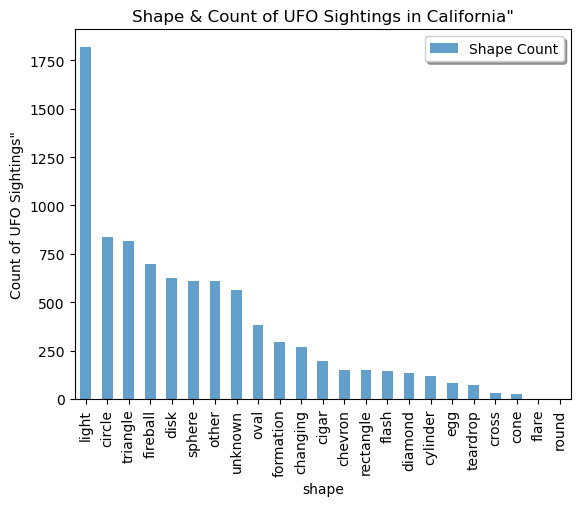

In [79]:
ax = shape_info_CA ['shape'].value_counts().plot(kind='bar', ylabel='Count of UFO Sightings"', alpha=0.7)
ax.legend(['Shape Count'], loc='upper right', shadow=True)
plt.title('Shape & Count of UFO Sightings in California"')
plt.show()

In [81]:
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder               2700   
3 1956-10-10 21:00:00        edna    TX      US    circle                 20   
4 1960-10-10 20:00:00     kaneohe    HI      US     light                900   
5 1961-10-10 19:00:00     bristol    TN      US    sphere                300   
7 1965-10-10 23:45:00     norwalk    CT      US      disk               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted   latitude  longitude         date      time  year  
0   4/27/2004  29.883056  -97.941111  1949-10-10  20:30:00  1949  
3   1/17/2004  28.978333  -96.645833  1956-10-10  21:00:00  1956  
4   1/22/2004  21.418056 -157.803611  1960-10-10  20:00:00  1960  
5   4/27/2007  36.595000  -82.188889  1961-10-10  19:00:00  1961  
7   10/2/1999  41.117500  -73.408333  1965-10-10  23:45:00  1965

In [83]:
US_CA_year_df= us_filtered_df[us_filtered_df['state'] == 'CA']['year'].value_counts()
US_CA_year_df.sort_index(inplace=True)

US_CA_df = pd.DataFrame(US_CA_year_df)
US_CA_df

count
year       
1937      1
1944      1
1945      1
1946      2
1947      4
...     ...
2010    506
2011    528
2012    634
2013    614
2014    260

[72 rows x 1 columns]

<Figure size 1000x1000 with 0 Axes>

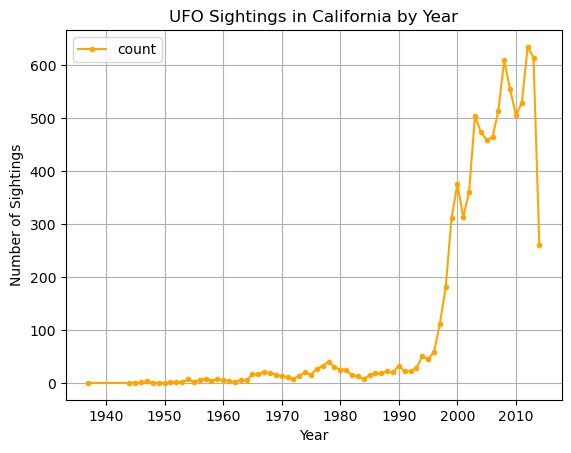

In [85]:
plt.figure(figsize=(10,10))
US_CA_df.plot(kind='line', y='count', title='UFO Sightings in California by Year', marker='o', markersize=3, color='orange')

# Add labels
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()

# Trends in the UFO sighting duration. Is there any significant difference in duration on sightings reported during daytime Vs night time?- when were more sightings recorded-night or daytime?

In [87]:
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder               2700   
3 1956-10-10 21:00:00        edna    TX      US    circle                 20   
4 1960-10-10 20:00:00     kaneohe    HI      US     light                900   
5 1961-10-10 19:00:00     bristol    TN      US    sphere                300   
7 1965-10-10 23:45:00     norwalk    CT      US      disk               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted   latitude  longitude         date      time  year  
0   4/27/2004  29.883056  -97.941111  1949-10-10  20:30:00  1949  
3   1/17/2004  28.978333  -96.645833  1956-10-10  21:00:00  1956  
4   1/22/2004  21.418056 -157.803611  1960-10-10  20:00:00  1960  
5   4/27/2007  36.595000  -82.188889  1961-10-10  19:00:00  1961  
7   10/2/1999  41.117500  -73.408333  1965-10-10  23:45:00  1965

In [89]:
# Define a function to classify time of day
def classify_time(datetime):
    if 6 <= datetime.hour < 18:  # 6 AM to 6 PM
        return 'Day'
    else:
        return 'Night'
df['time_of_day'] = df['datetime'].apply(classify_time)
df

datetime        city state country     shape  \
0     1949-10-10 20:30:00  san marcos    TX      US  cylinder   
3     1956-10-10 21:00:00        edna    TX      US    circle   
4     1960-10-10 20:00:00     kaneohe    HI      US     light   
5     1961-10-10 19:00:00     bristol    TN      US    sphere   
7     1965-10-10 23:45:00     norwalk    CT      US      disk   
...                   ...         ...   ...     ...       ...   
80327 2013-09-09 21:15:00   nashville    TN      US     light   
80328 2013-09-09 22:00:00       boise    ID      US    circle   
80329 2013-09-09 22:00:00        napa    CA      US     other   
80330 2013-09-09 22:20:00      vienna    VA      US    circle   
80331 2013-09-09 23:00:00      edmond    OK      US     cigar   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minutes   
3                     20             1/2 hour   
4                    900           15 minutes   
5                    300            5 minutes   
7                   1200           20 minutes   
...                  ...                  ...   
80327                600           10 minutes   
80328               1200           20 minutes   
80329               1200                 hour   
80330                  5            5 seconds   
80331               1020           17 minutes   

                                                comments date posted  \
0      This event took place in early fall around 194...   4/27/2004   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
5      My father is now 89 my brother 52 the girl wit...   4/27/2007   
7      A bright orange color changing to reddish colo...   10/2/1999   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...   9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   9/30/2013   
80329                                       Napa UFO&#44   9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   

        latitude  longitude         date      time  year time_of_day  
0      29.883056  -97.941111  1949-10-10  20:30:00  1949       Night  
3      28.978333  -96.645833  1956-10-10  21:00:00  1956       Night  
4      21.418056 -157.803611  1960-10-10  20:00:00  1960       Night  
5      36.595000  -82.188889  1961-10-10  19:00:00  1961       Night  
7      41.117500  -73.408333  1965-10-10  23:45:00  1965       Night  
...          ...         ...         ...       ...   ...         ...  
80327  36.165833  -86.784444  2013-09-09  21:15:00  2013       Night  
80328  43.613611 -116.202500  2013-09-09  22:00:00  2013       Night  
80329  38.297222 -122.284444  2013-09-09  22:00:00  2013       Night  
80330  38.901111  -77.265556  2013-09-09  22:20:00  2013       Night  
80331  35.652778  -97.477778  2013-09-09  23:00:00  2013       Night  

[66040 rows x 15 columns]

In [91]:
df['time_of_day'].value_counts()

time_of_day
Night    52986
Day      13054
Name: count, dtype: int64

In [93]:
US_df = df[df['country'] == 'US']
US_df['time_of_day'].value_counts()

time_of_day
Night    50610
Day      12489
Name: count, dtype: int64

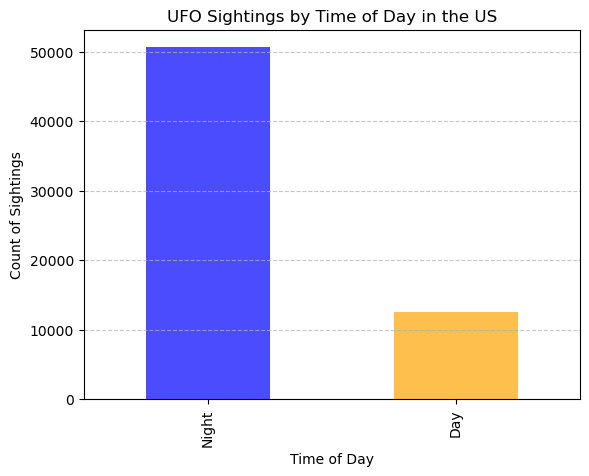

In [95]:
# Create a bar plot
#plt.bar(df['time_of_day'], df['count'], color=['blue', 'orange'], alpha=0.7)
US_df['time_of_day'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
# Add titles and labels
plt.title('UFO Sightings by Time of Day in the US')
plt.xlabel('Time of Day')
plt.ylabel('Count of Sightings')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()